In [2]:
import pandas as pd

# The Data

In [3]:
df_boston = pd.read_csv('Boston House Prices.csv')
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [4]:
df_boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


# Linear Regression with statmodels

In [5]:
import statsmodels.api as sm

## Simple Linear Regression

### Define the dependent and independent variables

In [6]:
y = df_boston["Value"] # Dependent variable
x = df_boston[["Rooms"]]  # Independent variable

### Exploring the dataset

<Axes: xlabel='Rooms', ylabel='Value'>

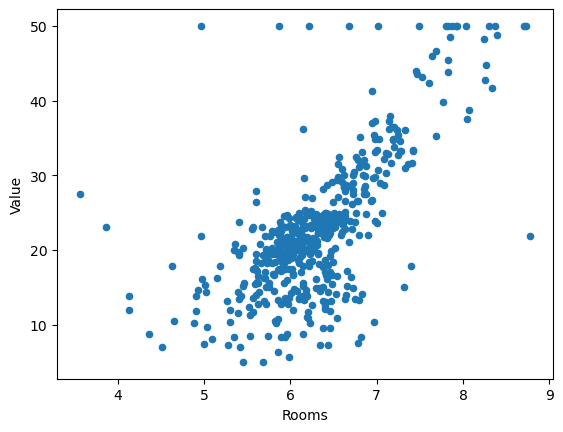

In [7]:
df_boston.plot(kind='scatter', x='Rooms', y='Value')

### Making the regression: Adding a constant and fitting the model

In [8]:
# adding a constant
sm.add_constant(x)

# fitting the model
lm = sm.OLS(y, x).fit() # OLS here stands for Ordinary Least Squares

In [9]:
# predicting values
lm.predict(x)

0      24.020779
1      23.458163
2      26.249323
3      25.566146
4      26.110495
         ...    
501    24.086539
502    22.358504
503    25.485772
504    24.820863
505    22.029703
Length: 506, dtype: float64

### The Regression Table

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):                   3.74e-256
Time:                        11:19:03   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rooms          3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Equation

In [11]:
# Rooms coefficient = 9.1021
# Contant coefficient = -34.6706


# Linear Equation: y = ax + b
# where a = Rooms coefficient, b = Constant coefficient

y_pred = 9.1021 * x + (-34.6706)
y_pred

,Rooms
0,25.175708
1,23.773984
2,30.727989
3,29.025896
4,30.382109
...,...
501,25.339545
502,21.034252
503,28.825650
504,27.169067


### Plotting the regression line

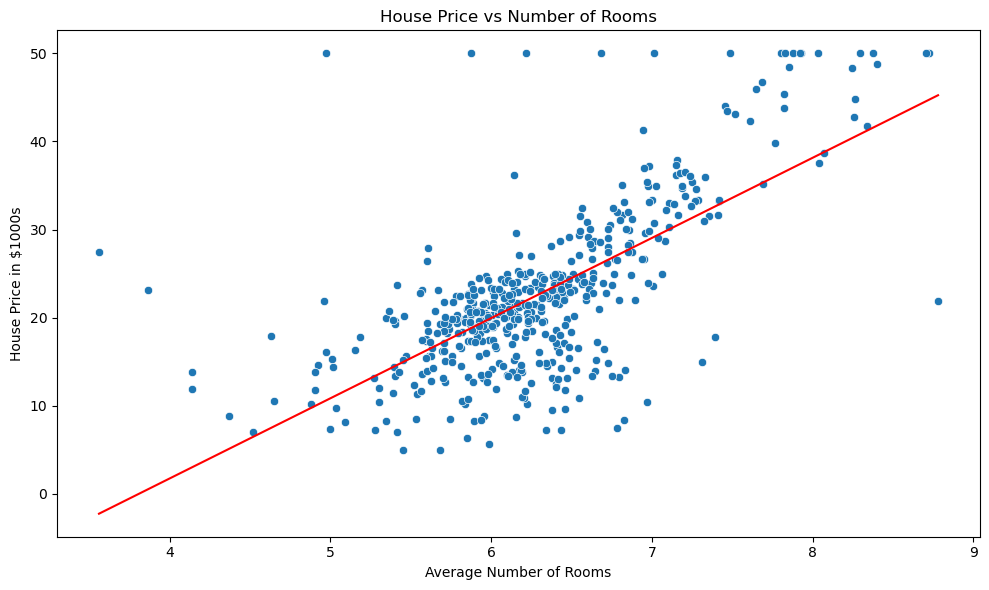

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotting the data points
plt.figure(figsize=(10,6), tight_layout=True)
sns.scatterplot(x=x["Rooms"], y=y)

# plotting the regression line
# y_pred has shape (n, 1) — squeeze() converts it to 1D so plotting works
sns.lineplot(x=x["Rooms"], y=y_pred.squeeze(), color='red')

# axes labels and title
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price in $1000s')
plt.title('House Price vs Number of Rooms')
plt.show()

# Mutiple Linear Regression

In [13]:
import statsmodels.api as sm

## Define the dependent and indepedent variable

In [15]:
# dependent variable
y = df_boston["Value"]

# independent variables
x = df_boston[["Rooms", "Distance"]]


## Making the regression: Adding a constant and fitting the model

In [16]:
x = sm.add_constant(x)
lm = sm.OLS(y, x).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.84e-75
Time:                        11:24:53   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression with Sklearn

In [18]:
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


## Linear Regression with Scikit-learn

In [19]:
from sklearn import linear_model

## Define the dependent and independent variables

In [20]:
# dependent variable
y = df_boston["Value"]
# independent variable
X = df_boston[["Rooms", "Distance"]]

## Fitting the model

In [21]:
lm = linear_model.LinearRegression()
lm.fit(X, y)

LinearRegression()

## Predicting the values

In [23]:
lm.predict(X)[:5]

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776])

### Regression Table

In [25]:
# r^2 score
lm.score(X,y)

0.4955246476058477

In [26]:
# coefficient 
lm.coef_

array([8.80141183, 0.48884854])

In [27]:
# intercept
lm.intercept_

-34.63605017547327